In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

def getVec(p1,p2,norm=True):
    ux = p2[0] - p1[0] 
    uy = p2[1] - p1[1]
    if norm:
        ln = np.sqrt(ux*ux + uy*uy)
        ux /= ln
        uy /= ln
    return (ux,uy)

def ptLineDist2(ptXY, line, dbg=False):
    lx, ly = getVec(line[0], line[1])
    px, py = getVec(line[0], ptXY, norm = False)
    # line normal
    nx = -ly
    ny = lx
    # proj (px,py) onto line normal
    nProj = np.abs(nx*px + ny*py)
    if dbg:
        print(lx,ly,nx,ny,px,py,nProj)
    return nProj
    
def unitTestPtLineDist2():
    pt1 = (0, 0)
    pt2 = (1, 0)
    pt3 = (0, 0.5)
    pt4 = (0.5, 0)
    pt5 = (0, 1)
    pt6 = (1, 1)
    pt7 = (0.5, 0.5)
    
    d = ptLineDist2(pt3, (pt1, pt2))
    print(d)
    
    d = ptLineDist2(pt7, (pt1, pt6))
    print(d)
    
    d = ptLineDist2(pt5, (pt1, pt6))
    print(d)
    
def RDPRecur(ptsList, thresh=0.25, n1=0, n2=None, lines=[], dbg=False, nRecur=0):
    nRecur += 1
    if dbg:
        print(nRecur,'........',n1,n2,len(lines))
        
    if n2 is None: # if not given, default to end of list
        n2 = len(ptsList)-1
        
    line = (ptsList[n1], ptsList[n2])
    dmax = 0
    if (n2-n1)>1:
        ds = []
        for n in range(n1+1,n2): # omit start, end points
            ds.append(ptLineDist2(ptsList[n], line))
        dmax = np.max(ds)
        
    if dmax<thresh: # all points  are good
        lines.append(line)
        if n2 < (len(ptsList)-1): # if not at end of list, call again
            if dbg:
                print((n1,n2),'-->',(n2,None),nRecur)
            return RDPRecur(ptsList, thresh, n2, None, lines, dbg, nRecur)
        else:
            return lines, nRecur
    else: # break at max deviation and call again
        nmax = np.argmax(ds) + n1 + 1 # add start value
        if dbg:
            print((n1,n2),'-->',(n1,nmax),dmax,nRecur)
        return RDPRecur(ptsList, thresh, n1, nmax, lines, dbg, nRecur)
    
def plotResult(pts, lines):
    parr = np.array(pts)
    plt.plot(parr[:,0], parr[:,1],'o')
    for ln in lines:
        plt.plot([ln[0][0], ln[1][0]], [ln[0][1], ln[1][1]],'-x')

### Inline (Unit) Test

In [2]:
pts = [
    [0, 0],
    [1, 0],
    [2, 0.2],
    [3, 0],
    [4, 0],
    [5, 0],
    [6, -0.3],
    [7, 0],
    [8, 0],
    [9, 0],
]

6


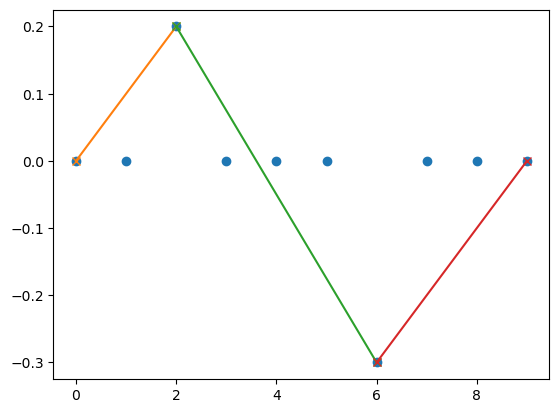

In [3]:
lines, nCalls = RDPRecur(pts, lines=[])
print(nCalls)
plotResult(pts,lines)

### Pts from JSON file

62


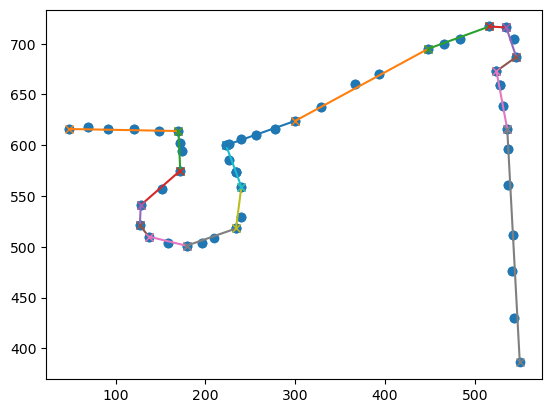

In [5]:
pts = json.load(open('test/ptsList1.json','r'))
lines, nCalls = RDPRecur(pts, thresh=5, lines=[])
print(nCalls)
plotResult(pts,lines)

In [6]:
with open('test/ptsList1.csv','w') as f:
    for pt in pts:
        f.write('%d,%d\n'%(pt[0],pt[1]))

In [8]:
lines

[([48, 616], [170, 614]),
 ([170, 614], [172, 575]),
 ([172, 575], [128, 541]),
 ([128, 541], [127, 521]),
 ([127, 521], [137, 510]),
 ([137, 510], [179, 501]),
 ([179, 501], [234, 518]),
 ([234, 518], [240, 559]),
 ([240, 559], [223, 600]),
 ([223, 600], [300, 624]),
 ([300, 624], [448, 695]),
 ([448, 695], [516, 717]),
 ([516, 717], [535, 716]),
 ([535, 716], [546, 687]),
 ([546, 687], [524, 673]),
 ([524, 673], [536, 616]),
 ([536, 616], [550, 386])]